## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [14]:

# Load data
data = pd.read_csv("/Users/ethanschultz/Downloads/ha_1.csv")
data_clean = data.dropna()
data_clean["diagnosis"] = data_clean["diagnosis"].map({'No Disease': 0, 'Disease': 1})  # Replace with actual categories

# Define features and target
X = data[['age', 'chol']]
y = data['diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "chol"])  # Standardize age and chol
    ],
    remainder="passthrough"
)

# Logistic regression pipeline
logreg = Pipeline(
    [("preprocessing", ct), ("log", LogisticRegression())]
)

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Extract coefficients and intercept
log_model = logreg.named_steps['log']
print("Model Coefficients:")
print(log_model.coef_)
print("Intercept:")
print(log_model.intercept_)


Accuracy: 0.56
Confusion Matrix:
[[24 12]
 [15 11]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

Model Coefficients:
[[0.43575626 0.09356188]]
Intercept:
[-0.23830027]
Accuracy: 0.56
Confusion Matrix:
[[24 12]
 [15 11]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

Model Coefficients:
[[0.43575626 0.09356188]]
Intercept:
[-0.23830027]


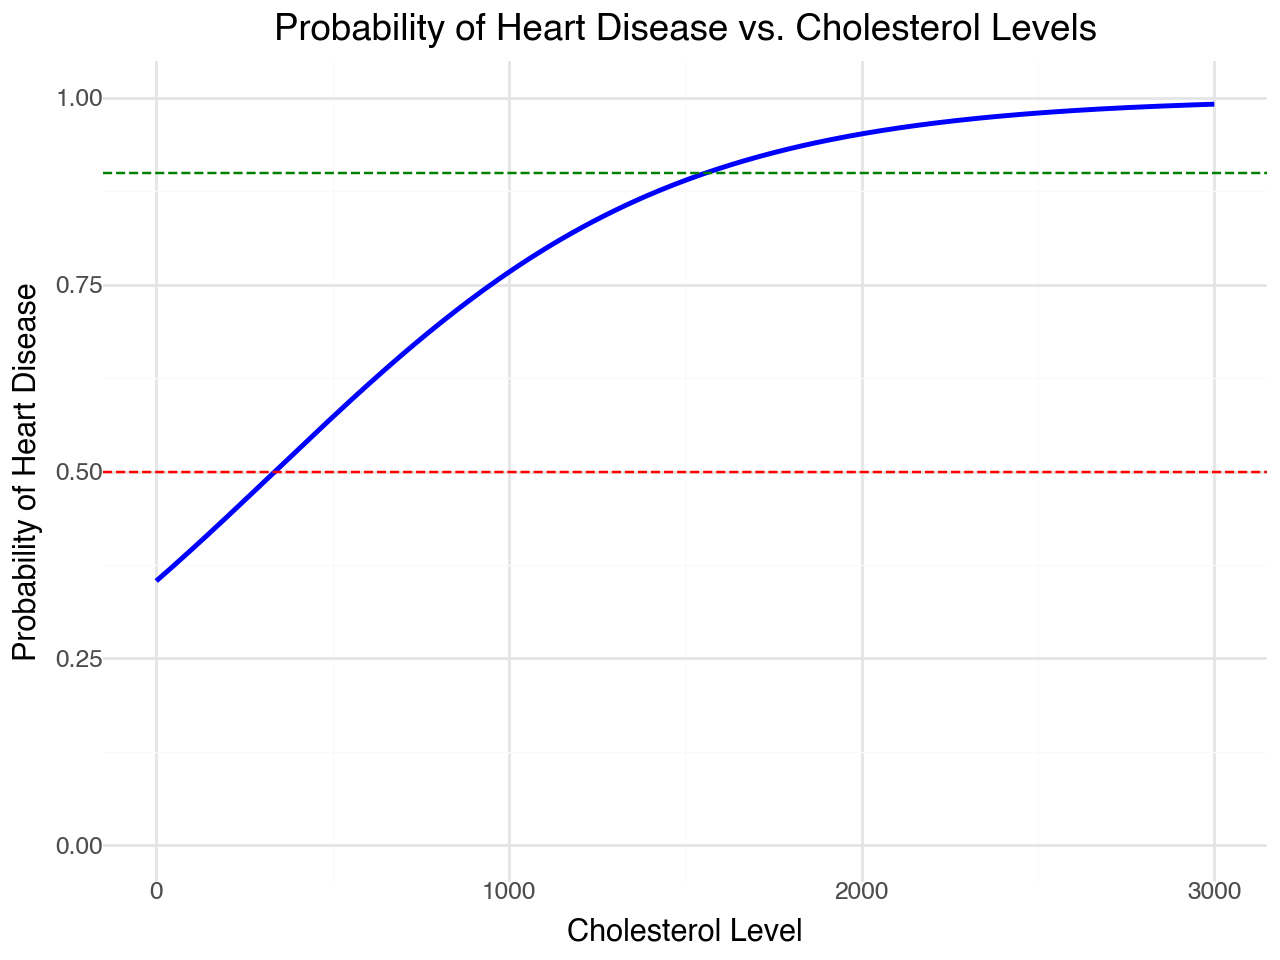

In [26]:
import plotnine
from plotnine import *
import numpy as np

cholesterol_levels = np.arange(0, 3001, 10)  # Cholesterol levels from 0 to 500 in steps of 10
data_55 = pd.DataFrame({
    "age": [55] * len(cholesterol_levels),
    "chol": cholesterol_levels
})
probabilities = logreg.predict_proba(data_55)[:, 1]  # Probability of heart disease (class 1)

# Add probabilities to the dataset
data_55['probability'] = probabilities

(
    ggplot(data_55, aes(x='chol', y='probability')) +
    geom_line(color='blue', size=1) +  # Line plot for probabilities
    geom_hline(yintercept=0.5, linetype='dashed', color='red') +  # Decision threshold
     ylim(0,1) +
    geom_hline(yintercept=0.9, linetype="dashed", color = "green") +
    labs(
        title="Probability of Heart Disease vs. Cholesterol Levels",
        x="Cholesterol Level",
        y="Probability of Heart Disease"
    ) +
    theme_minimal()
)

Around a cholesterol of 350 for 55 year olds to have heart disease and the cholesterol value for 90% certianty of having heart disease is around 1550.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [33]:
lda = Pipeline(
    [("preprocessing", ct), ("lda", LinearDiscriminantAnalysis())]
)

# Fit the model
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Extract coefficients and intercept
lda_model = lda.named_steps['lda']
print("Model Coefficients:")
print(lda_model.coef_)
print("Intercept:")
print(lda_model.intercept_)

Accuracy: 0.56
Confusion Matrix:
[[24 12]
 [15 11]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

Model Coefficients:
[[0.44622706 0.09117852]]
Intercept:
[-0.23852861]
Accuracy: 0.56
Confusion Matrix:
[[24 12]
 [15 11]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

Model Coefficients:
[[0.44622706 0.09117852]]
Intercept:
[-0.23852861]


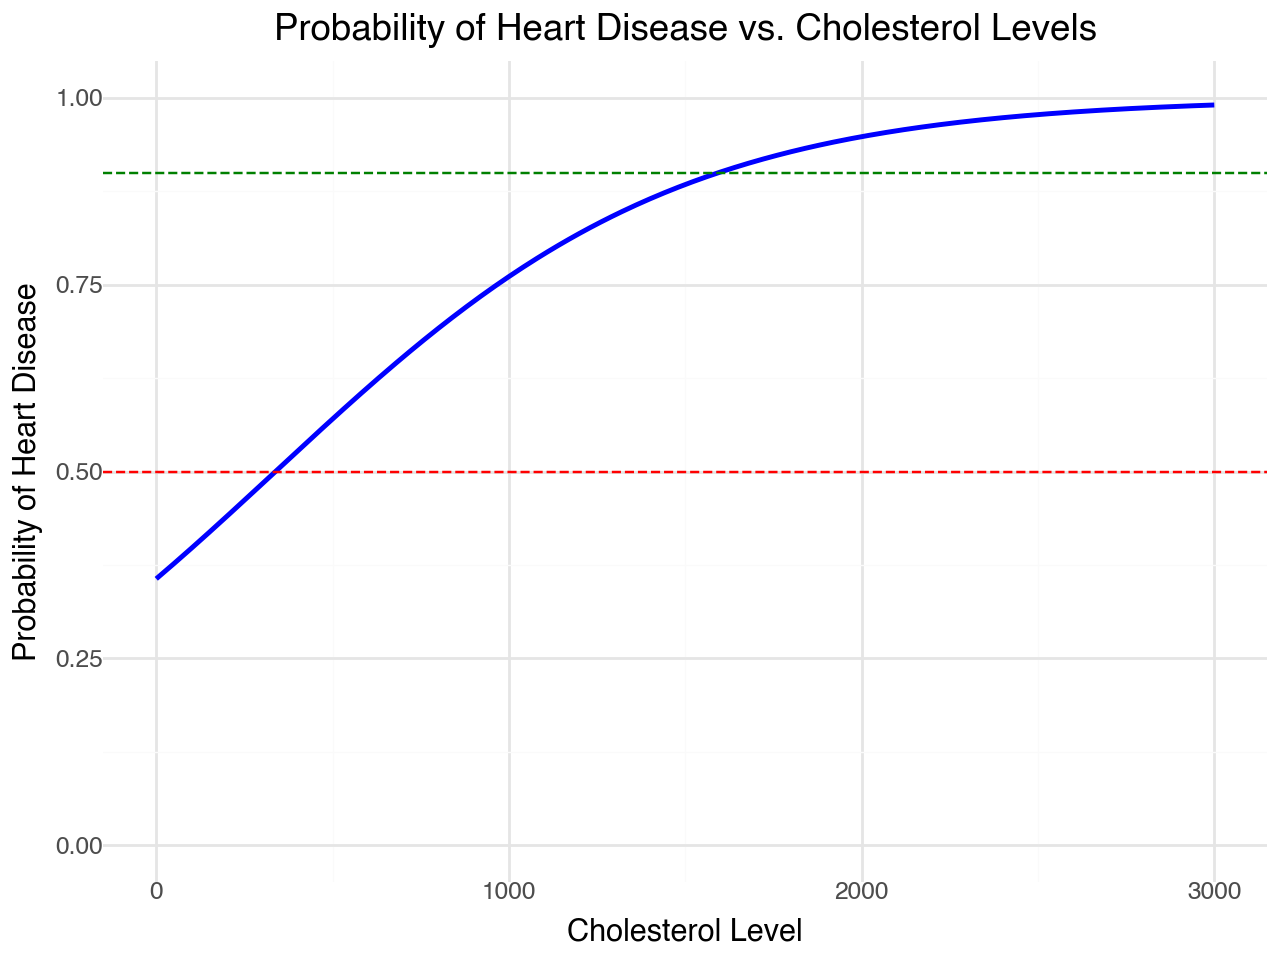

In [34]:
probabilities = lda.predict_proba(data_55)[:, 1]  # Probability of heart disease (class 1)

# Add probabilities to the dataset
data_55['probability'] = probabilities

(
    ggplot(data_55, aes(x='chol', y='probability')) +
    geom_line(color='blue', size=1) +  # Line plot for probabilities
    geom_hline(yintercept=0.5, linetype='dashed', color='red') +  # Decision threshold
     ylim(0,1) +
    geom_hline(yintercept=0.9, linetype="dashed", color = "green") +
    labs(
        title="Probability of Heart Disease vs. Cholesterol Levels",
        x="Cholesterol Level",
        y="Probability of Heart Disease"
    ) +
    theme_minimal()
)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [38]:
svc = Pipeline(
    [("preprocessing", ct), ("svc", SVC(probability= True))]
)

# Fit the model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Extract coefficients and intercept
svc_model = svc.named_steps['svc']
print("Model Coefficients:")
print(svc_model.coef_)
print("Intercept:")
print(svc_model.intercept_)

Accuracy: 0.60
Confusion Matrix:
[[22 14]
 [11 15]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.67      0.61      0.64        36
  No Disease       0.52      0.58      0.55        26

    accuracy                           0.60        62
   macro avg       0.59      0.59      0.59        62
weighted avg       0.60      0.60      0.60        62

Model Coefficients:
Accuracy: 0.60
Confusion Matrix:
[[22 14]
 [11 15]]
Classification Report:
              precision    recall  f1-score   support

     Disease       0.67      0.61      0.64        36
  No Disease       0.52      0.58      0.55        26

    accuracy                           0.60        62
   macro avg       0.59      0.59      0.59        62
weighted avg       0.60      0.60      0.60        62

Model Coefficients:


AttributeError: coef_ is only available when using a linear kernel

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.